### 1. Given two 1-d arrays of simulated values and observed values, Write a Pyhton function 

### to calculate the mean error, coefficient of determination and nash coefficient. Loops are NOT allowed.

In [6]:
import numpy as np

# https://www.tutorialspoint.com/numpy/numpy_statistical_functions.htm
##############################################################################################################
# 1. Given two 1-D arrays of simulated values and observed values, write a Python function
# to calculate the mean error, coefficient of determination, and nash coefficient. Loops are NOT allowed.

# simulate data by generating two 1-D arrays each with 10 elements between 1-100
simulatedVals = np.random.rand(1,10)*100
observedVals = np.random.rand(1,10)*100

def arraysMeanError(simVals, obsVals):
    """ 'arraysMeanError' function calculates mean error between two arrays"""
    
    # convert lists to arrays
    simVals = np.asarray(simVals)
    obsVals = np.asarray(obsVals)
    meanError = np.mean(simVals-obsVals)
    return meanError

def coeffDetermination(simVals, obsVals):
    """ 'coeffDetermination' function calculates coefficient of determination
    for regression between two numbers in arrays"""
    
    # convert lists to arrays
    simVals = np.asarray(simVals)
    obsVals = np.asarray(obsVals)
    numObs = obsVals.size
    # r^2 value (i.e. coefficient of determination)
    coeffcient_of_determination = (numObs*np.sum(simVals*obsVals)-np.sum(simVals)*np.sum(obsVals))**2/ \
        ((numObs*np.sum(simVals**2)-np.sum(simVals)**2)*(numObs*np.sum(obsVals**2)-np.sum(obsVals)**2))
            
    return coeffcient_of_determination

# https://www.hydrol-earth-syst-sci.net/23/4323/2019/
# https://tonyladson.wordpress.com/2019/08/20/model-performance-based-on-coefficient-of-efficiency/
def nashCoefficient(simVals, obsVals):
    """ function calculates Nash coefficient """   
    nashCoef = 1-np.sum((simVals-obsVals)**2)/np.sum((obsVals-np.mean(obsVals))**2)
    return nashCoef

np.set_printoptions(precision=2)
print(simulatedVals)
print(observedVals)
print(f'mean error= {arraysMeanError(simulatedVals, observedVals):.2f}')
print(f'nash coefficient= {nashCoefficient(simulatedVals,observedVals):.4f}')
print(f'coefficient of determination= {coeffDetermination(simulatedVals,observedVals):.4f}')

[[81.13 24.14 99.2  91.37 37.89 41.75 94.67 40.85 95.42 42.63]]
[[32.92 61.46  0.84 41.35 53.73 69.31 82.07 72.79 76.11 48.35]]
mean error= 11.01
nash coefficient= -2.4355
coefficient of determination= 0.0903


### 2. Given `x` and `y`, write a Python function to perform linear regression 

### which returns `a`, `c` and `sum of square errors` where `ax + c = y` 
```python
def linear_regression(x, y):
    
    return a, c, ssqe
```

In [7]:
##############################################################################################################
# 2. Given x and y, write a Python function to perform linear regression
# which returns a, c, and sum of square error where ax+c=y

#https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/

def linearRegression(x,y):
    
    x = np.array(x)
    y = np.array(y)
    numObs = x.size
 
    # slope
    a = (numObs*np.sum(x*y)-np.sum(x)*np.sum(y))/(numObs*np.sum(x**2)-np.sum(x)**2)
    
    # intercept
    c = (np.sum(y)*np.sum(x**2)-np.sum(x)*np.sum(x*y))/(numObs*np.sum(x**2)-np.sum(x)**2)
    
    # calculate predicted 'y' from linear equaiton for which we just found the slope & intercept (i.e. y=a*x+c)
    # then find the error by getting the difference between the predicted value and the actual value at that 'x'
    sqError = np.sum(((a*x+c)-y)**2)
       
    return a, c, sqError

x = [1,2,3,4,5,6,7,8,9,10]
y = [0,3,4,4,6,6,8,9,9,11]

info = linearRegression(x,y)

print(f'slope= {info[0]:.3f}')
print(f'intercept= {info[1]:.3f}')
print(f'sum of square error= {info[2]:.2f}')

slope= 1.079
intercept= 0.067
sum of square error= 3.99


### 3. Eestimate the mean precipitation on different land use types.

```python
landuse = np.random.randint(1, 5, [5, 5])
precip  = np.random.random([5, 5])

print('landuse\n', landuse)
print('precip \n', precip)
```



In [8]:
##############################################################################################################
# 3. Esimate the mean precipitation on different land use types.

# https://stackoverflow.com/questions/47409777/efficiently-sum-elements-of-a-numpy-array-corresponding-to-indices-matched-by-an

landuse = np.random.randint(1, 5, [5, 5])
precip  = np.random.random([5, 5])

def meanPrecip(landuse, precip):
    
    landUseDictionary = {}
    
    for ii in np.unique(landuse):
        landUseDictionary[ii] = precip[landuse == ii].mean()
    
    return landUseDictionary

print('landuse\n', landuse)
print('precip \n', precip)
print(meanPrecip(landuse, precip))

landuse
 [[3 3 3 4 2]
 [2 4 3 1 4]
 [1 3 1 1 3]
 [1 1 4 4 1]
 [1 4 4 2 1]]
precip 
 [[0.94 0.22 0.33 0.53 0.98]
 [0.34 0.78 0.18 0.31 0.26]
 [0.82 0.92 0.17 0.18 0.39]
 [0.57 0.53 0.08 0.9  0.28]
 [0.94 0.2  0.59 0.65 0.46]]
{1: 0.4726534824426712, 2: 0.6585670094842618, 3: 0.4949792043288462, 4: 0.47552225225546013}


### 4. We have two array. The first array is the distribution of irrigated land. 

### The second array is the precipitation. 

```python
landuse = np.random.randint(0, 1, [6, 6])
precip  = np.random.random([6, 6])

print('landuse\n', landuse)
print('precip \n', precip)
```

A. Create a function to create the buffer zones of varied distances to the irrigated land.

B. Calculate the mean precipitation in the buffer zones of different distance to the irrigated land.


{0.0: 0.5564360669801222, 1.0: 0.5109697948224297, 1.4142135623730951: 0.5935635505843907, 2.0: 0.7540108850815487, 2.23606797749979: 0.4167361814893151, 2.8284271247461903: 0.75230428576747, 3.1622776601683795: 0.28983358964698713}


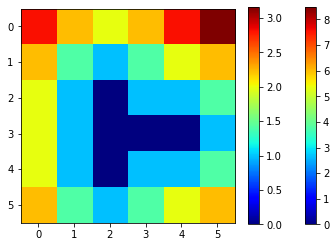

In [9]:
##############################################################################################################
# 4. We have two arrays. The first array is the distribution of irrigated land.
# The second array is the precipitation.
# A. Create a function to create the buffer zones of varied distances to the irrigated land.
# B. Calculate the mean precipitation in the buffer zones of different distance to the irrigated land.

import numpy as np
import matplotlib.pyplot as plt

landuse = [
    [0,0,0,0,0,0],
    [0,0,0,0,0,0],
    [0,0,1,0,0,0],
    [0,0,1,1,1,0],
    [0,0,1,0,0,0],
    [0,0,0,0,0,0],
    ]

precip  = np.random.random([6, 6])
plt.imshow(landuse)

# define an array with distance to the center

distX = np.arange(13).reshape([1,13])
distY = np.arange(13).reshape([13,1])
distance = ((distX-6)**2+(distY-6)**2)**0.5
plt.imshow(distance, cmap='jet'); plt.colorbar()

def createBuffer(landuse, distance=distance):
    
    buffer = np.full_like(landuse, 1e9)
    n,m = buffer.shape
    index = np.nonzero(landuse)
    for i,j in np.array(index).T:
        distBuffer = distance[(6-i):(6-i+n), (6-j):(6-j+m)]
        buffer = np.where(distBuffer < buffer, distBuffer, buffer)
    return buffer

buffer = createBuffer(landuse)
plt.imshow(buffer, cmap='jet'); plt.colorbar()

# from problem #3
def meanPrecip(landuse, precip):
    
    landUseDictionary = {}
    
    for ii in np.unique(landuse):
        landUseDictionary[ii] = precip[landuse == ii].mean()
    
    return landUseDictionary

print(meanPrecip(buffer, precip))

### 5. Write a Python function to find the nearest point of a list of given points. 

### You are not allowed to use any type of loops.

e. g. points = [(3, 4), (1, 2), (7, 8), (9, 4), (6, 5), (8, 7), (4, 7)]

Hint: using numpy to create a N x N array which contain the distances between each ith an jth point pair; where N is the numer of points.

In [10]:
##############################################################################################################
# 5. Write a Python function to find the nearest point of a list given points.
# You are not allowed to use any type of loops.

# e. g. points = [(3, 4), (1, 2), (7, 8), (9, 4), (6, 5), (8, 7), (4, 7)]
# Hint: using numpy to create a N x N array which contain the distances between each ith an jth point pair; where N is the numer of points.

points = [(3, 4), (1, 2), (7, 8), (9, 4), (6, 5), (8, 7), (4, 7)]
points = np.array(points)

# use method from the solution
distances = ((points.reshape(7, 1, 2) - points.reshape(1, 7, 2)) ** 2).sum(axis=2)
distances[np.arange(7), np.arange(7)] = 1e9
print(distances)
closestPoints = np.argmin(distances, axis=0)
print(closestPoints)


# try alternate solution with one line:
# http://people.duke.edu/~ccc14/sta-663-2016/03A_Numbers.html
oneLine = np.sum((points[None,:] - points[:,None])**2, -1)
oneLine[np.arange(7), np.arange(7)] = 1e9
print(oneLine)
closestPt = np.argmin(oneLine, axis=0)
print(closestPt)

[[1000000000          8         32         36         10         34
          10]
 [         8 1000000000         72         68         34         74
          34]
 [        32         72 1000000000         20         10          2
          10]
 [        36         68         20 1000000000         10         10
          34]
 [        10         34         10         10 1000000000          8
           8]
 [        34         74          2         10          8 1000000000
          16]
 [        10         34         10         34          8         16
  1000000000]]
[1 0 5 4 5 2 4]
[[1000000000          8         32         36         10         34
          10]
 [         8 1000000000         72         68         34         74
          34]
 [        32         72 1000000000         20         10          2
          10]
 [        36         68         20 1000000000         10         10
          34]
 [        10         34         10         10 1000000000          8
           8]